# Logistics Regression

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
x, y = make_classification(random_state=41 ,n_samples=100, n_features=2, n_informative=1, n_redundant=0,n_classes=2,hypercube=False, n_clusters_per_class=1, class_sep=10)

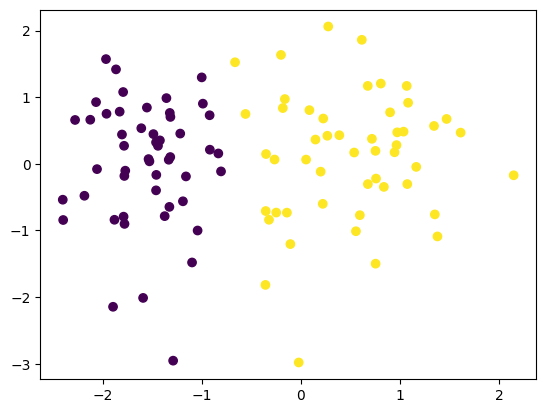

In [ ]:
plt.scatter(x[:,0],x[:,1], c=y)

In [4]:
np.insert(x, 0, 1, axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [5]:
def step(z):
    return 1 if z>0 else 0

def percepton(x, y):
    x = np.insert(x, 0, 1, axis=1)
    # now x has n+1 columns
    weights = np.ones(x.shape[1])
    lr = 0.01
    
    for i in range(1000):
        j = np.random.randint(0, x.shape[0])
        y_hat = step(np.dot(x[j], weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
    return weights[0], weights[1:]

In [6]:
intercept, coeff = percepton(x, y)

In [7]:
intercept, coeff

(np.float64(0.9199999999999999), array([1.31350245, 0.24169466]))

In [8]:
# Ax + By + C = 0 convert it into y = mx + b
# y = -A/B x - C/B b
# m = -A/B
# b = -C/B
m = -(coeff[0]/coeff[1])
b = -(intercept/coeff[1])

In [9]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

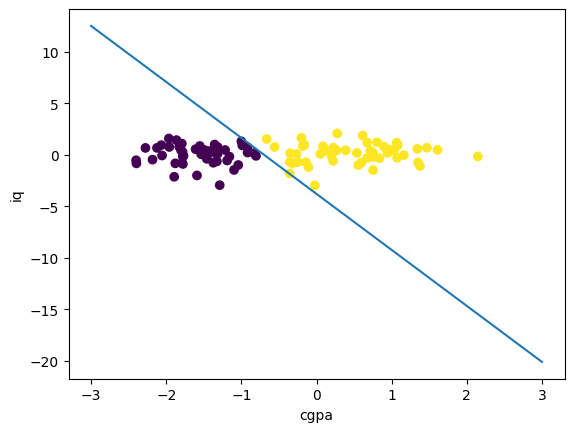

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(x_input, y_input)
plt.scatter(x[:,0],x[:,1], c=y)
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.show()
plt.savefig('save1.png')

In [11]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [12]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [13]:
m,b = perceptron(x,y)

In [14]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
plt.show()
anim.save('decision_boundary.gif', writer='pillow', fps=30)

# anim.save('decision_boundary.mp4', fps=30)


<IPython.core.display.Javascript object>

## Logistic Regression Using Scikit Learn

In [15]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x, y)

LogisticRegression()

In [16]:
lor.intercept_, lor.coef_

(array([2.25106636]), array([[3.50144121, 0.02773483]]))

In [17]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [18]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m*x_input1+b

In [23]:
plt.plot(x_input, y_input)
plt.plot(x_input1, y_input1)
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.show()

<IPython.core.display.Javascript object>

In [24]:
plt.plot(x_input, y_input)
plt.scatter(x[:,0],x[:,1], c=y)
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.show()

<IPython.core.display.Javascript object>